# House prices in Sydney and Melbourne


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from scipy import stats

df = pandas.read_csv('https://raw.githubusercontent.com/skipperkongen/datasets/main/house-prices/data.csv').sort_values('date')
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
36,2014-05-02 00:00:00,440000.0,2.0,1.0,800,4850,1.0,0,0,4,800,0,1944,0,4801-4899 6th Ave NW,Seattle,WA 98107,USA
37,2014-05-02 00:00:00,287200.0,3.0,3.0,1850,19966,1.0,0,0,4,1090,760,1992,0,23017 SE 281st Ct,Maple Valley,WA 98038,USA
38,2014-05-02 00:00:00,403000.0,3.0,2.0,1960,13100,1.0,0,2,5,1650,310,1957,0,17825 4th Ave SW,Normandy Park,WA 98166,USA
39,2014-05-02 00:00:00,750000.0,3.0,2.5,2390,6550,1.0,0,2,4,1440,950,1955,2009,3628 59th Ave SW,Seattle,WA 98116,USA


## View data

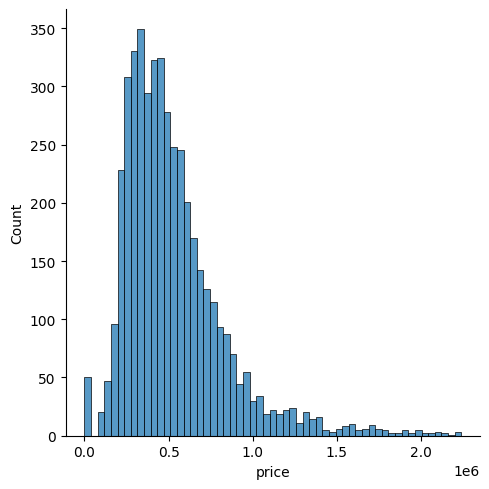

In [2]:
z = np.abs(stats.zscore(df.price))
df_plot = df[z < 3]
sns.displot(df_plot.price)

## Clean data

In [3]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [4]:
df = df.query('price > 0')

## Split data into train and test

In [5]:
train, test = train, test = train_test_split(df, test_size=0.3, shuffle=False)
y_col = 'price'
x_cols = train.select_dtypes(include=np.number).drop(columns=[y_col]).columns
x_train, y_train = train[x_cols], train[y_col]
x_test, y_test = test[x_cols], test[y_col]
len(train), len(test)

(3185, 1366)

## Linear regression (1 variable)

In [6]:
lr1 = LinearRegression()
one_x_col = ['sqft_living']
lr1.fit(x_train[one_x_col], y_train)

y_pred = lr1.predict(x_test[one_x_col])
print(f'MAPE: {100*round(mean_absolute_percentage_error(y_test, y_pred), 2)}%')
a = " + ".join([f'{round(coef, 2)} * {name}' for name, coef in zip(one_x_col, lr1.coef_)])
b = round(lr1.intercept_, 2)
print(f'y = {a} + {b}')


MAPE: 37.0%
y = 272.29 * sqft_living + -29269.45


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


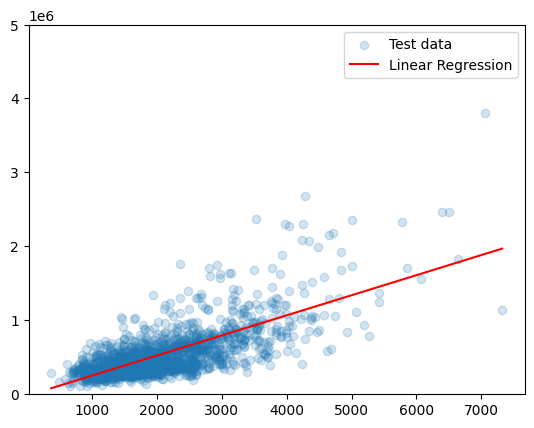

In [7]:
plt.scatter(x_test.sqft_living, y_test, alpha=0.2, label='Test data')
x_plot = np.linspace(test.sqft_living.min(), test.sqft_living.max(), len(test))
y_plot = lr1.predict(x_plot.reshape(-1, 1))
plt.plot(x_plot, y_plot, color='red', label='Linear Regression')
plt.legend()
plt.ylim((-10000, 5000000))
plt.show()

## Linear regression (best variables)

<Axes: >

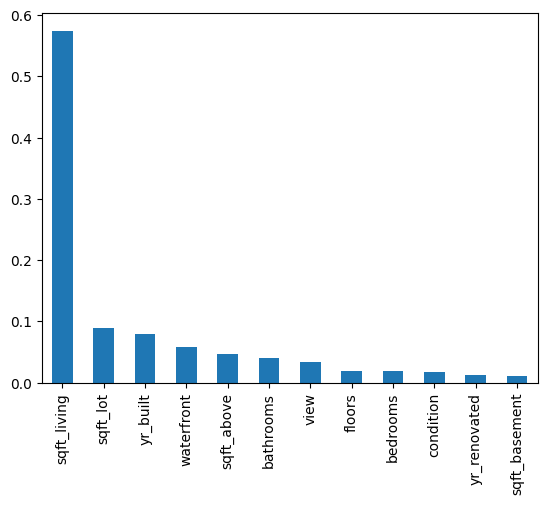

In [8]:
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
ser = pandas.Series(tree.feature_importances_, index=x_train.columns)
feature_importance = ser.sort_values(ascending=False)
feature_importance.plot.bar()

In [9]:
n_cols = 8
best_x_cols = feature_importance.index[:n_cols]
lr2 = LinearRegression()
lr2.fit(x_train[best_x_cols], y_train)

y_pred = lr2.predict(x_test[best_x_cols])
print(f'MAPE: {100*round(mean_absolute_percentage_error(y_test, y_pred), 2)}%')
a = " + ".join([f'{round(coef, 2)} * {name}' for name, coef in zip(best_x_cols, lr2.coef_)])
b = round(lr2.intercept_, 2)
print(f'y = {a} + {b}')



MAPE: 34.0%
y = 222.31 * sqft_living + -0.66 * sqft_lot + -2730.04 * yr_built + 679589.53 * waterfront + 34.77 * sqft_above + 31565.89 * bathrooms + 56060.96 * view + 57641.28 * floors + 5231861.94
